<a href="https://colab.research.google.com/github/orbenishay/pandas-project/blob/master/Bicycle_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bay Area Bike Rental** 
![alt text](https://media-cdn.tripadvisor.com/media/attractions-splice-spp-540x360/07/32/ba/20.jpg)

In [0]:
# Import modules
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from datetime import datetime
import calendar

## **Background**
the database includes bike rental data in San Francisco and the Bay area.<h5>
The dataset consists of 4 tables: trips (95K rental entries) in addition to dimensions of bikes, station and weather.<h5>
We cleanned the tables from unnecessary columns that we could calculate in the notebook, in order to speed the data load.


## Import Dataset

In [5]:
if 'google.colab' in sys.modules:
    from google.colab import files
    uploaded = files.upload()

Saving bikes.csv to bikes.csv


# Station DataFrame

In [6]:
df_station = pd.read_csv("station.csv", index_col = 'id')
df_station.head()

,station_name,lat,long,dock_count,city,installation_date
id,,,,,,
2,San Jose Diridon Caltrain Station,37.329732,-121.901782,24,San Jose,08/06/2013
3,San Jose Civic Center,37.330698,-121.888979,30,San Jose,08/05/2013
4,Santa Clara at Almaden,37.333988,-121.894902,27,San Jose,08/06/2013
5,Adobe on Almaden,37.331415,-121.893200,16,San Jose,08/05/2013
6,San Pedro Square,37.336721,-121.894074,28,San Jose,08/07/2013


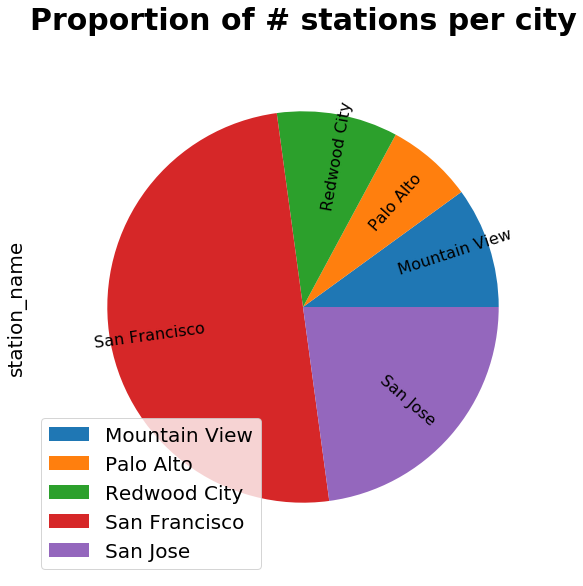

In [20]:
df_station.groupby('city')['station_name'].count().plot.pie(fontsize=16, figsize=(10,10), labeldistance=0.5, rotatelabels=True, counterclock=True, radius= 0.9)
plt.legend(('Mountain View', 'Palo Alto', 'Redwood City','San Francisco','San Jose'),loc='lower left', fontsize=20)
plt.title('Proportion of # stations per city', fontsize=30, weight='bold')
plt.rcParams['font.size'] = 20

(array([ 0., 10., 20., 30., 40., 50.]), <a list of 6 Text yticklabel objects>)

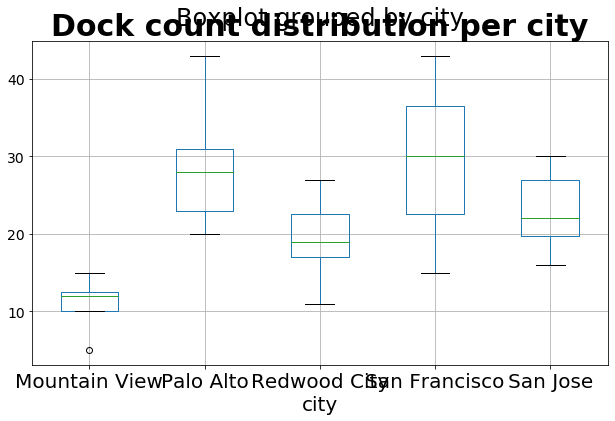

In [24]:
df_station.boxplot(by='city', column= 'dock_count', figsize=(10,6))
plt.title('Dock count distribution per city', fontsize=30, weight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)

In [0]:
df_station.drop(columns = ['lat', 'long']).groupby('city').describe()

dock_count                                                    
                   count       mean       std   min    25%   50%   75%   max
city                                                                        
Mountain View        7.0  11.000000  3.162278   5.0  10.00  12.0  12.5  15.0
Palo Alto            5.0  29.000000  8.916277  20.0  23.00  28.0  31.0  43.0
Redwood City         7.0  19.428571  5.380742  11.0  17.00  19.0  22.5  27.0
San Francisco       35.0  29.714286  8.827002  15.0  22.50  30.0  36.5  43.0
San Jose            16.0  22.937500  4.343098  16.0  19.75  22.0  27.0  30.0

## Weather DataFrame

In [0]:
df_weather = pd.read_csv("weather.csv", parse_dates=['date'])
df_weather['date'] = pd.to_datetime(df_weather['date'], errors='coerce')
df_weather['date']=df_weather['date'].dt.date
df_weather['mean_temperature_c'] = (df_weather['mean_temperature_f'] - 32)*(5/9)
df_weather['mean_wind_speed_kph'] = df_weather['mean_wind_speed_mph'] /1.609344 
df_weather['date_month'] = pd.DatetimeIndex(df_weather['date']).month
df_weather['date_day'] = pd.DatetimeIndex(df_weather['date']).day
df_weather['month'] = df_weather['date_month'].apply(lambda x: calendar.month_abbr[x])
df_weather.head()

,date,mean_temperature_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,mean_temperature_c,mean_wind_speed_kph,date_month,date_day,month
0,2013-08-29,68.0,75.0,10.0,11.0,0,4.0,NaN,286.0,94107,20.000000,6.835083,8,29,Aug
1,2013-08-30,69.0,70.0,10.0,13.0,0,2.0,NaN,291.0,94107,20.555556,8.077825,8,30,Aug
2,2013-08-31,64.0,75.0,10.0,15.0,0,4.0,NaN,284.0,94107,17.777778,9.320568,8,31,Aug
3,2013-09-01,66.0,68.0,10.0,13.0,0,4.0,NaN,284.0,94107,18.888889,8.077825,9,1,Sep
4,2013-09-02,69.0,77.0,10.0,12.0,0,6.0,NaN,277.0,94107,20.555556,7.456454,9,2,Sep


(array([  0.,  50., 100.]), <a list of 3 Text yticklabel objects>)

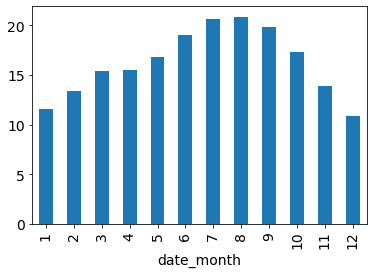

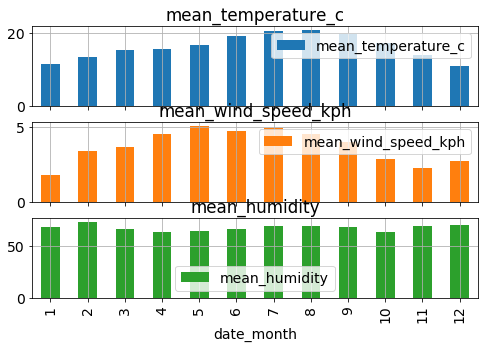

In [0]:
plt_w1=df_weather.groupby('date_month')['mean_temperature_c'].mean().plot.bar()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
df_weather_agg=df_weather.groupby(['date_month']).agg({'mean_temperature_c': 'mean', 'mean_wind_speed_kph': 'mean', 'mean_humidity': 'mean'})
df_weather_agg.plot(kind='bar', stacked=False, figsize=(8, 5), subplots=True, grid= True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([ 0.,  5., 10., 15., 20., 25.]), <a list of 6 Text yticklabel objects>)

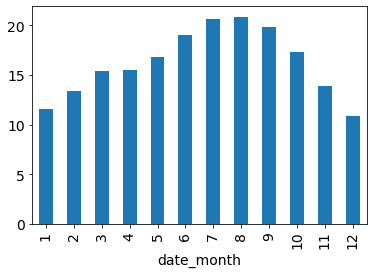

In [0]:
df_weather.groupby('date_month')['mean_temperature_c'].mean().plot.bar()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([ 0.,  5., 10., 15., 20.]), <a list of 5 Text yticklabel objects>)

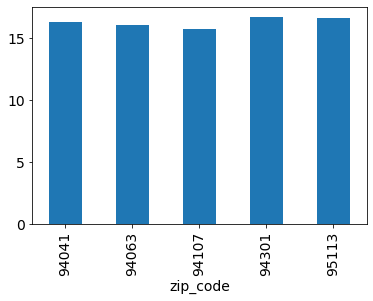

In [0]:
df_weather.groupby('zip_code')['mean_temperature_c'].mean().plot.bar()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([ 0.,  5., 10., 15., 20.]), <a list of 5 Text yticklabel objects>)

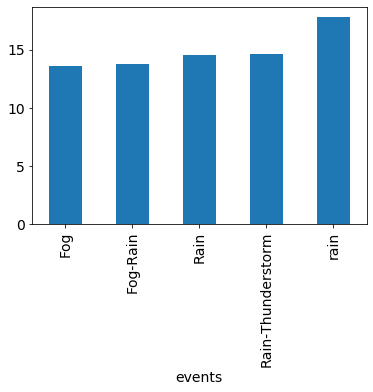

In [0]:
df_weather.groupby('events')['mean_temperature_c'].mean().plot.bar()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Trip DataFrame

In [0]:
df_trip = pd.read_csv("trip.csv", parse_dates=True)
df_trip['start_date'] = pd.to_datetime(df_trip['start_date'], errors='coerce', dayfirst=True)
df_trip['end_date'] = pd.to_datetime(df_trip['end_date'], errors='coerce', dayfirst=True)
df_trip['date_day']=df_trip['start_date'].dt.date
df_trip['duration']=df_trip['end_date']-df_trip['start_date']
df_trip['start_date'] = df_trip['start_date'].dt.date
df_trip.head()

,id,start_station_id,end_station_id,bike_id,subscription_type,zip_code,start_date,end_date_orig,end_date,date_day,duration
0,111309,35,35,247,Customer,94301,2013-11-30,08/12/2013 22:06,2013-12-08 22:49:00,2013-11-30,8 days 09:20:00
1,129504,2,12,653,Subscriber,94041,2013-12-18,25/12/2013 13:18,2013-12-25 13:29:00,2013-12-18,7 days 04:13:00
2,364841,27,27,13,Customer,94041,2014-07-15,19/07/2014 17:18,2014-07-19 17:45:00,2014-07-15,4 days 01:22:00
3,364842,27,27,126,Customer,94041,2014-07-15,19/07/2014 08:47,2014-07-19 09:21:00,2014-07-15,3 days 16:58:00
4,21917,14,6,650,Customer,95113,2013-09-15,17/09/2013 18:28,2013-09-17 19:04:00,2013-09-15,2 days 18:27:00


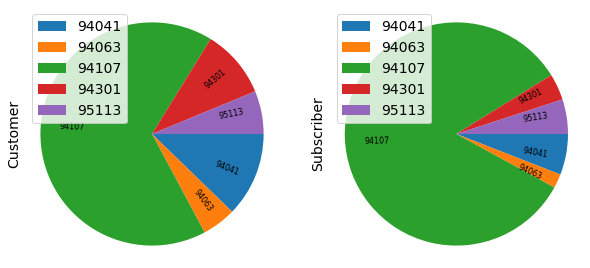

In [0]:
df_trip_subscription = df_trip.groupby(['subscription_type', 'zip_code'])['id'].count().unstack(0).plot.pie(fontsize=8,subplots=True, figsize=(10,8), labeldistance=0.6, rotatelabels=True, counterclock=False, radius= 1.1)
plt.rcParams['font.size'] = 14

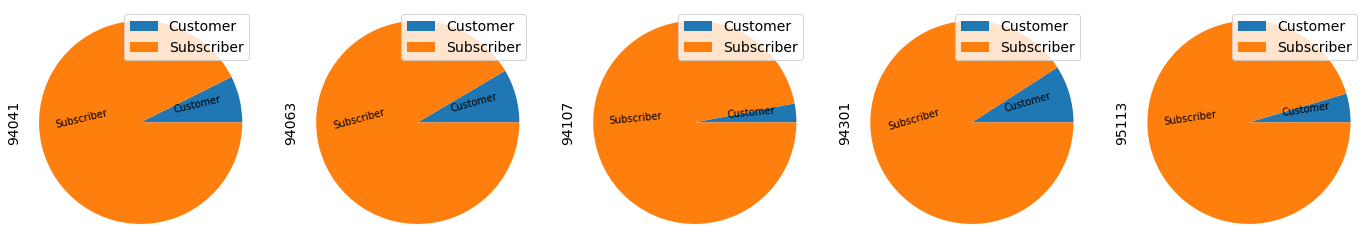

In [0]:
df_trip_zipcode = df_trip.groupby(['subscription_type', 'zip_code'])['id'].count().unstack(1).plot.pie(subplots=True, figsize=(24,16), fontsize=10, labeldistance=0.32, rotatelabels=True, center=(0,2), radius= 1.1)
plt.rcParams['font.size'] = 14

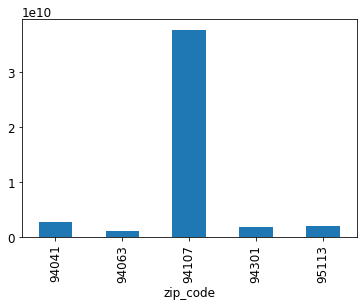

In [0]:
df_trip.groupby('zip_code')['id'].sum().plot.bar()
plt.rcParams['font.size'] = 14

## Bikes DataFrame

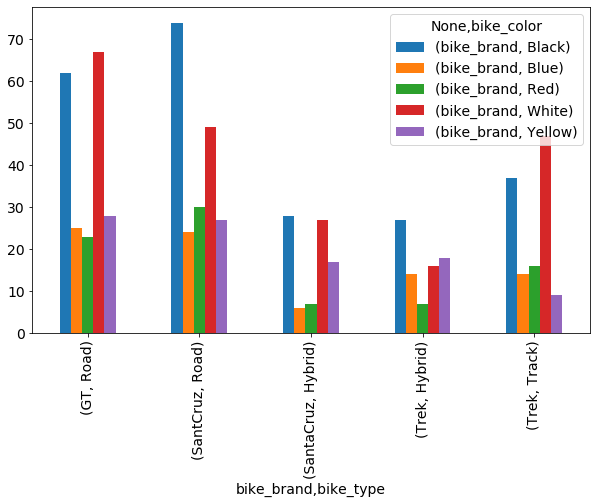

In [0]:
df_bikes = pd.read_csv("bikes.csv", index_col = 'bike_id')
plot = df_bikes.groupby(['bike_brand', 'bike_type', 'bike_color']).agg({'bike_brand':'count'}).unstack(2).plot.bar(figsize=(10,6))
plt.rcParams['font.size'] = 14

## **Merge**

We merged all the tables into one big table

In [0]:
df_trip_weather = df_trip.merge(df_weather, how='left', left_on = ['zip_code', 'date_day'], right_on=['zip_code','date'])
df_trip_weather_station = df_trip_weather.merge(df_station, how='left', left_on = 'start_station_id', right_on='id')
df_all = df_trip_weather_station.merge(df_bikes, how='left', left_on = 'bike_id', right_on='bike_id')
df_all.head()


,id,start_station_id,end_station_id,bike_id,subscription_type,zip_code,start_date,end_date_orig,end_date,date_day_x,duration,date,mean_temperature_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,mean_temperature_c,mean_wind_speed_kph,date_month,date_day_y,month,station_name,lat,long,dock_count,city,installation_date,bike_brand,bike_type,bike_color
0,111309,35,35,247,Customer,94301,2013-11-30,08/12/2013 22:06,2013-12-08 22:49:00,2013-11-30,8 days 09:20:00,2013-11-30,55.0,63.0,10.0,1.0,0,0.0,NaN,340.0,12.777778,0.621371,11,30,Nov,University and Emerson,37.444521,-122.163093,28,Palo Alto,8/15/2013,Trek,Track,Black
1,129504,2,12,653,Subscriber,94041,2013-12-18,25/12/2013 13:18,2013-12-25 13:29:00,2013-12-18,7 days 04:13:00,2013-12-18,50.0,72.0,8.0,1.0,0,0.0,NaN,324.0,10.000000,0.621371,12,18,Dec,San Jose Diridon Caltrain Station,37.329732,-121.901782,24,San Jose,08/06/2013,Trek,Track,White
2,364841,27,27,13,Customer,94041,2014-07-15,19/07/2014 17:18,2014-07-19 17:45:00,2014-07-15,4 days 01:22:00,2014-07-15,71.0,71.0,10.0,8.0,0,2.0,NaN,334.0,21.666667,4.970970,7,15,Jul,Mountain View City Hall,37.389218,-122.081896,5,Mountain View,8/16/2013,Trek,Track,White
3,364842,27,27,126,Customer,94041,2014-07-15,19/07/2014 08:47,2014-07-19 09:21:00,2014-07-15,3 days 16:58:00,2014-07-15,71.0,71.0,10.0,8.0,0,2.0,NaN,334.0,21.666667,4.970970,7,15,Jul,Mountain View City Hall,37.389218,-122.081896,5,Mountain View,8/16/2013,Trek,Track,Black
4,21917,14,6,650,Customer,95113,2013-09-15,17/09/2013 18:28,2013-09-17 19:04:00,2013-09-15,2 days 18:27:00,2013-09-15,68.0,68.0,10.0,8.0,0,3.0,NaN,317.0,20.000000,4.970970,9,15,Sep,Arena Green / SAP Center,37.332692,-121.900084,22,San Jose,08/05/2013,Trek,Track,Red


# Most popular stations by city

* Most of the stations are in San Francisco
* The most popular station is in San Fracisco: 'Mountain View City Hal'

In [0]:
df_station_count = df_trip.merge(df_station, how='left', left_on = 'start_station_id', right_on='id')
station_by_city = df_station_count.groupby(['station_name', 'city']).agg({'station_name':'count'}).unstack(1)
station_by_city.head()

station_name                                              
city              Mountain View Palo Alto Redwood City San Francisco San Jose
station_name                                                                 
2nd at Folsom               NaN       NaN          NaN        4704.0      NaN
2nd at South Park           NaN       NaN          NaN        5740.0      NaN
2nd at Townsend             NaN       NaN          NaN        7575.0      NaN
5th at Howard               NaN       NaN          NaN        2806.0      NaN
Adobe on Almaden            NaN       NaN          NaN           NaN     65.0

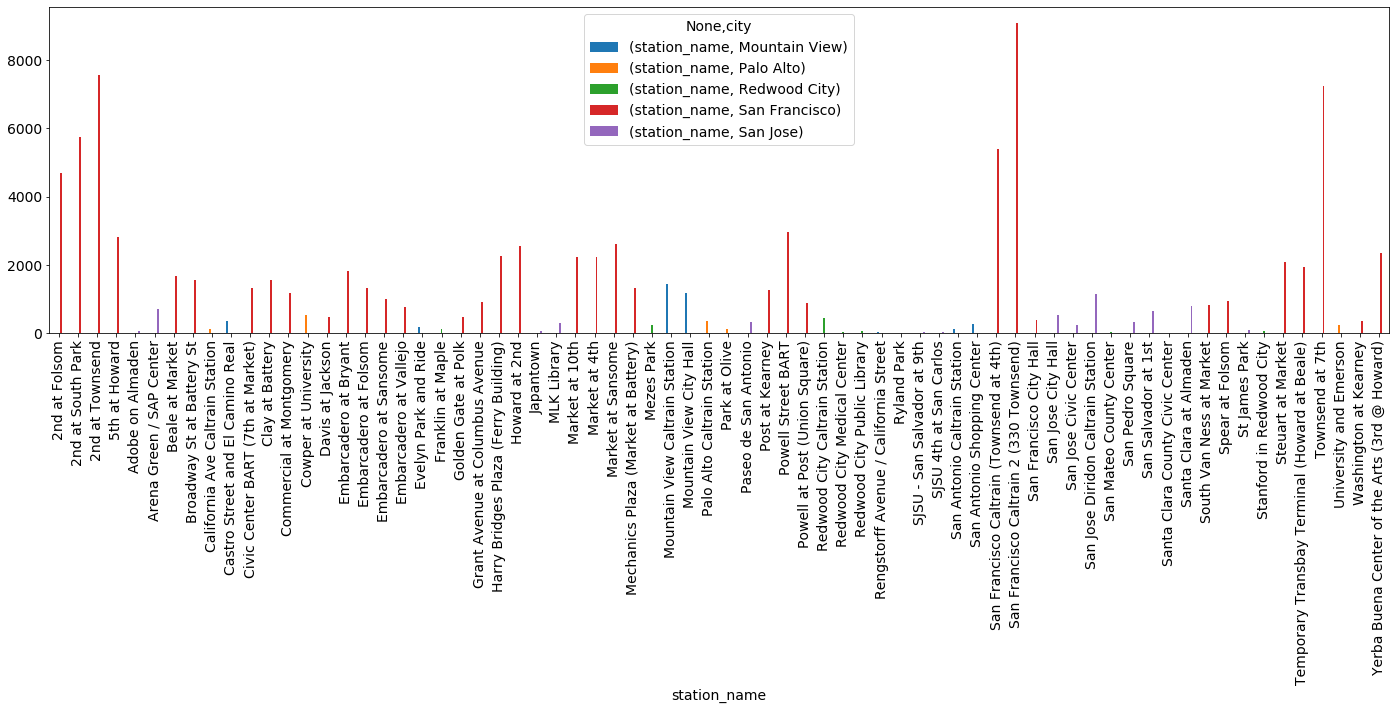

In [0]:
station_by_city.plot(kind='bar',figsize=(24,6), fontsize=14)
plt.rcParams['font.size'] = 12

## Trip duration dependency on weather condition

* The longest trip durations was at 26+ degrees

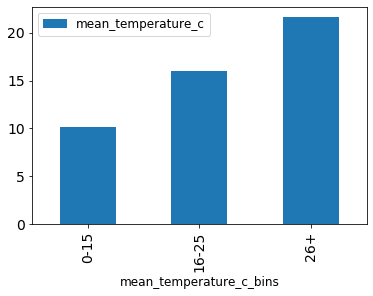

In [0]:
df_all['mean_temperature_c_bins'] = pd.cut(x= df_all['mean_temperature_c'], bins= 3, labels= ['0-15', '16-25', '26+'], duplicates = 'drop')
boxplot = df_all.groupby('mean_temperature_c_bins')['mean_temperature_c', 'duration'].mean()
boxplot.plot.bar(fontsize=14)
plt.rcParams['font.size'] = 12

In [0]:
temp_dur.groupby("mean_temperature_c_bins").describe()

duration               ...                 
                           count         mean  ...     75%      max
mean_temperature_c_bins                        ...                 
0-15                     10152.0  2534.905437  ...  3180.0  86160.0
16-25                    74646.0  2421.499076  ...  3240.0  86340.0
26-50                    10490.0  2506.632984  ...  3240.0  80880.0

[3 rows x 8 columns]

In [0]:
df_all.groupby("mean_temperature_c_bins").describe()

id                 ... dock_count      
                           count           mean  ...        75%   max
mean_temperature_c_bins                          ...                 
0-15                     10152.0  400456.035461  ...       23.0  27.0
16-25                    74646.0  474839.543057  ...       23.0  27.0
26-50                    10490.0  549661.631840  ...       23.0  27.0

[3 rows x 144 columns]

## Popular Bike Type brand & color

* most trips use type X, where the popular brand is X and Santa Cruz


,id,start_station_id,end_station_id,bike_id,zip_code,duration,mean_temperature_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,cloud_cover,wind_dir_degrees,mean_temperature_c,mean_wind_speed_kph,date_month,date_day_y,lat,long,dock_count
count,95299.000000,95299.000000,95299.000000,95299.000000,95299.000000,95299,95288.000000,95086.000000,95214.000000,95299.000000,95299.000000,95299.000000,95288.000000,95299.000000,95299.000000,95299.000000,95299.000000,95299.000000,95299.000000
mean,475183.364327,57.627719,57.999328,422.835465,94160.650930,0 days 00:41:34.631633,60.795021,68.331647,9.592949,7.549313,3.570992,259.180107,15.997234,4.690926,6.392481,15.654834,37.735259,-122.352862,28.114314
std,258281.677679,17.364316,17.637250,158.655081,223.719255,0 days 01:21:20.885424,6.203300,10.166949,1.159041,3.598821,2.310179,75.436105,3.446278,2.236203,3.431409,8.621666,0.132828,0.131644,9.583180
min,4275.000000,2.000000,2.000000,9.000000,94041.000000,0 days 00:01:00,38.000000,24.000000,4.000000,0.000000,0.000000,0.000000,3.333333,0.000000,1.000000,1.000000,37.329732,-122.418954,5.000000
25%,244942.500000,51.000000,51.000000,327.000000,94107.000000,0 days 00:23:00,56.000000,63.000000,10.000000,5.000000,1.000000,254.000000,13.333333,3.106856,3.000000,8.000000,37.776600,-122.402717,18.000000
50%,503456.000000,63.000000,64.000000,436.000000,94107.000000,0 days 00:39:00,60.000000,69.000000,10.000000,8.000000,4.000000,278.000000,15.555556,4.970970,6.000000,16.000000,37.781752,-122.395470,30.000000
75%,690114.500000,69.000000,69.000000,546.000000,94107.000000,0 days 00:54:00,66.000000,74.000000,10.000000,10.000000,5.000000,301.000000,18.888889,6.213712,9.000000,23.000000,37.788446,-122.392738,35.000000
max,913455.000000,84.000000,84.000000,878.000000,95113.000000,8 days 09:20:00,84.000000,96.000000,20.000000,23.000000,8.000000,2772.000000,28.888889,14.291537,12.000000,31.000000,37.804770,-121.877349,43.000000


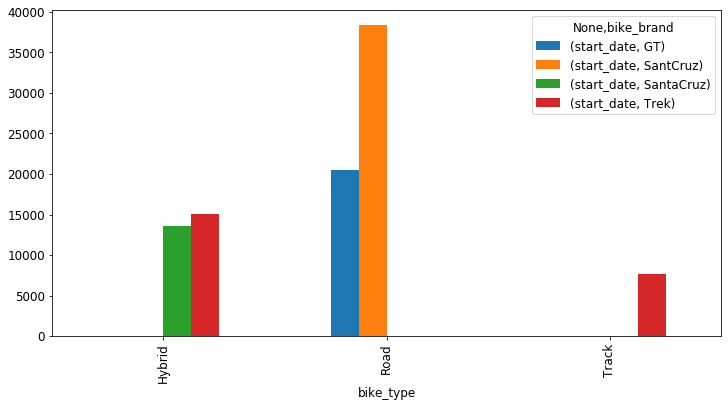

In [0]:
df_group_bike_trips=df_all.groupby(['bike_type','bike_brand']).agg({'start_date':'count'})
df_group_bike_trips.head()
df_group_bike_trips.unstack(-1).plot(kind='bar', figsize=(12, 6), subplots=False)


df_all.describe()

#add bike type depend on temperture